In [0]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob



In [150]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [167]:
import io
train=pd.read_csv(io.BytesIO(uploaded['train.csv']))

KeyError: ignored

In [168]:
train.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,1,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,1,NaN,399,5
1,@wawinereport,35,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,35,Columbia Valley,9668,17
2,NaN,18,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,18,NaN,10873,11
3,@vossroger,11,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,11,NaN,5427,1
4,@vossroger,11,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,11,NaN,3789,9


In [170]:
train['price'].fillna(train['price'].mean(), inplace=True)
train['country'].dropna( inplace=True)

pd.isnull(train).sum() > 0

user_name              True
country               False
review_title          False
review_description    False
designation            True
points                False
price                 False
province               True
region_1              False
region_2               True
winery                False
variety               False
dtype: bool

Label Encoding of Strings

In [171]:
le = LabelEncoder() 
train['variety']= le.fit_transform(train['variety']) 
train['country']= le.fit_transform(train['country'])
train['region_1']= le.fit_transform(train['region_1'])
train['winery']= le.fit_transform(train['winery'])
train['country'].unique()

array([ 1, 35, 18, 11,  0, 25,  2,  6, 27, 13, 32, 17, 10,  3, 31, 28, 30,
       14,  5, 34, 19, 22, 37,  4, 15, 23, 24, 12, 36,  7, 26, 33, 20,  8,
        9, 21, 29, 16])

Grouping features for country wise inspection


In [0]:
df1 = train.groupby('country')['points'].mean().reset_index()
df2 = train.groupby('country')['price'].mean().reset_index()
df3 = train.groupby('country')['variety'].mean().reset_index()

In [207]:
df1

,country,points
0,0,86.798833
1,1,87.917315
2,2,90.372093
3,3,84.571429
4,4,88.129032
5,5,89.375000
6,6,86.470425
7,7,85.500000
8,8,87.166667
9,9,86.333333


In [208]:
df2

,country,price
0,0,25.546861
1,1,29.641332
2,2,32.494052
3,3,24.703176
4,4,15.193548
5,5,33.873674
6,6,21.026093
7,7,27.237039
8,8,15.166667
9,9,15.333333


In [209]:
df3

,country,variety
0,0,9.214008
1,1,10.438716
2,2,13.100423
3,3,10.428571
4,4,12.623656
5,5,12.261364
6,6,12.354549
7,7,18.666667
8,8,21.500000
9,9,21.000000


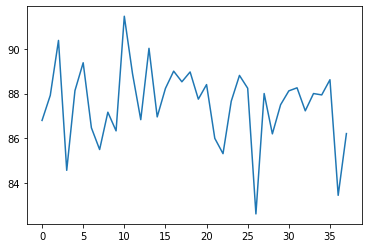

In [240]:
x=df1['country']
y=df1['points']
plt.plot(x,y)

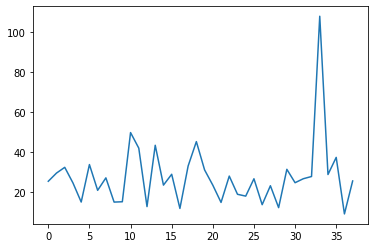

In [241]:
x=df2['country']
y=df2['price']
plt.plot(x,y)

In [0]:
predictor_vars=['points','price']
pred=['variety']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[predictor_vars],train[pred],test_size=0.2, random_state=42)

In [0]:
Model=RandomForestClassifier(max_depth=11)

In [221]:
Pred=Model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_pred = Model.predict(X_test)

In [223]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.17475199612872006

**Country wise modelling(US)**

In [0]:
Points_0=[]
Price_0=[]
variety_0=[]
region_0=[]
winery_0=[]
review_description_0=[]
for i  in range(0,80000):
    if(train.iloc[i,1]==0):
       Points_0.append(train.iloc[i,5])
       Price_0.append(train.iloc[i,6])
       variety_0.append(train.iloc[i,11])
       region_0.append(train.iloc[i,8])
       winery_0.append(train.iloc[i,10])
       review_description_0.append(train.iloc[i,3])


Sentiment Analysis for Review sentiment

In [225]:
review_result=[]
sid = SentimentIntensityAnalyzer()


for sentence in review_description_0:
     ss = sid.polarity_scores(sentence)
     print(ss)
     for k in ss:
         
         if(k=="neg"):
         	neg = ss[k]
         	
         if(k=="pos"):
         	pos = ss[k]
         	
     
     if(pos>neg):
     	review_result.append(1)
     else:
     	review_result.append(0)

print(review_result)

{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.7469}
{'neg': 0.039, 'neu': 0.923, 'pos': 0.039, 'compound': 0.0}
{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.069, 'neu': 0.866, 'pos': 0.065, 'compound': 0.204}
{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8074}
{'neg': 0.037, 'neu': 0.963, 'pos': 0.0, 'compound': -0.128}
{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.743}
{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'compound': 0.2023}
{'neg': 0.083, 'neu': 0.792, 'pos': 0.125, 'compound': 0.25}
{'neg': 0.02, 'neu': 0.835, 'pos': 0.146, 'compound': 0.836}
{'neg': 0.045, 'neu': 0.906, 'pos': 0.049, 'compound': 0.0258}
{'neg': 0.073, 'neu': 0.837, 'pos': 0.089, 'compound': 0.2144}
{'neg': 0.077, 'neu': 0.853, 'pos': 0.07, 'compound': -0.0772}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.6808}
{'neg': 0.024, 'neu'

In [226]:
Var={'Points':Points_0, 'Price':Price_0, 'region':region_0,'winery':winery_0,'variety':variety_0,'review':review_result}
train_0=pd.DataFrame(Var)
train_0.head()

,Points,Price,region,winery,variety,review
0,85,13.0,0,388,3,1
1,86,20.0,0,429,14,0
2,84,10.0,0,11337,9,0
3,83,25.0,0,1607,9,0
4,88,15.0,0,13740,2,1


Correlation between variables

In [227]:
train_0.corr()

,Points,Price,region,winery,variety,review
Points,1.000000,0.571132,NaN,0.024851,-0.072494,0.290398
Price,0.571132,1.000000,NaN,-0.029377,-0.026768,0.097877
region,NaN,NaN,NaN,NaN,NaN,NaN
winery,0.024851,-0.029377,NaN,1.000000,-0.046496,-0.014621
variety,-0.072494,-0.026768,NaN,-0.046496,1.000000,-0.018218
review,0.290398,0.097877,NaN,-0.014621,-0.018218,1.000000


In [0]:
predictor_vars=['Points','Price','region','winery','review']
pred=['variety']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_0[predictor_vars],train_0[pred],test_size=0.2, random_state=42)

In [236]:
Pred=Model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_pred = Model.predict(X_test)

In [238]:
precision_score(y_test,y_pred,pos_label='Yes',average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.40696358602744287

In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.45271629778672035